<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5;">
    <h2 style="color: #333;">Objective:</h2>
    <p>Surprise Housing, a US-based real estate company, aims to expand its operations into the Australian housing market. Leveraging data analytics, the company intends to purchase properties below market value and sell them at a profit. The primary objectives are:</p>
    <ol>
        <li>Determine the key factors influencing house prices.</li>
        <li>Evaluate the effectiveness of these factors in predicting property prices.</li>
    </ol>
 
<h2 style="color: #333;">Business Goals:</h2>
    <p>The business objectives encompass:</p>
    <ol>
        <li>Developing a regression model with regularization to forecast the actual values of potential properties and make informed investment decisions.</li>
        <li>Identifying the optimal lambda values for ridge and lasso regression techniques.</li>
        <li>Empowering management with insights into price dynamics linked to various variables.</li>
        <li>Adapting the company's strategy to focus on areas with the highest profit potential.</li>
        <li>Gaining a deep understanding of pricing dynamics in the new Australian market.</li>
    </ol>
</div>


In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppressing warnings
warnings.filterwarnings("ignore")

# Data preprocessing and feature scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE

# Linear regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Model evaluation metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Multicollinearity check
from statsmodels.stats.outliers_influence import variance_inflation_factor


C:\Users\ayush\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>Exploring the Dataset</h2>


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.shape

(1460, 81)

In [5]:
df.describe([0.25,0.50,0.75,0.99])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
99%,1445.410000,190.000000,141.000000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.920000,1572.410000,830.380000,1797.050000,2155.050000,2219.460000,1418.920000,360.000000,3123.480000,2.000000,1.000000,3.000000,1.000000,5.000000,2.000000,11.000000,2.000000,2009.000000,3.000000,1002.790000,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,201

In [6]:
# Checking the percentage of missing values in all columns
missing_percentage = round(df.isnull().sum() / len(df) * 100, 2)
missing_columns = missing_percentage[missing_percentage > 0]

print('Percentage of Missing Values in each column:')
print(missing_columns)


Percentage of Missing Values in each column:
LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64


<p>There are 18 features in the dataset that contain missing values, and among them, 5 features have more than 45% of their values missing.</p>


<h2>Exploratory Data Analysis</h2>

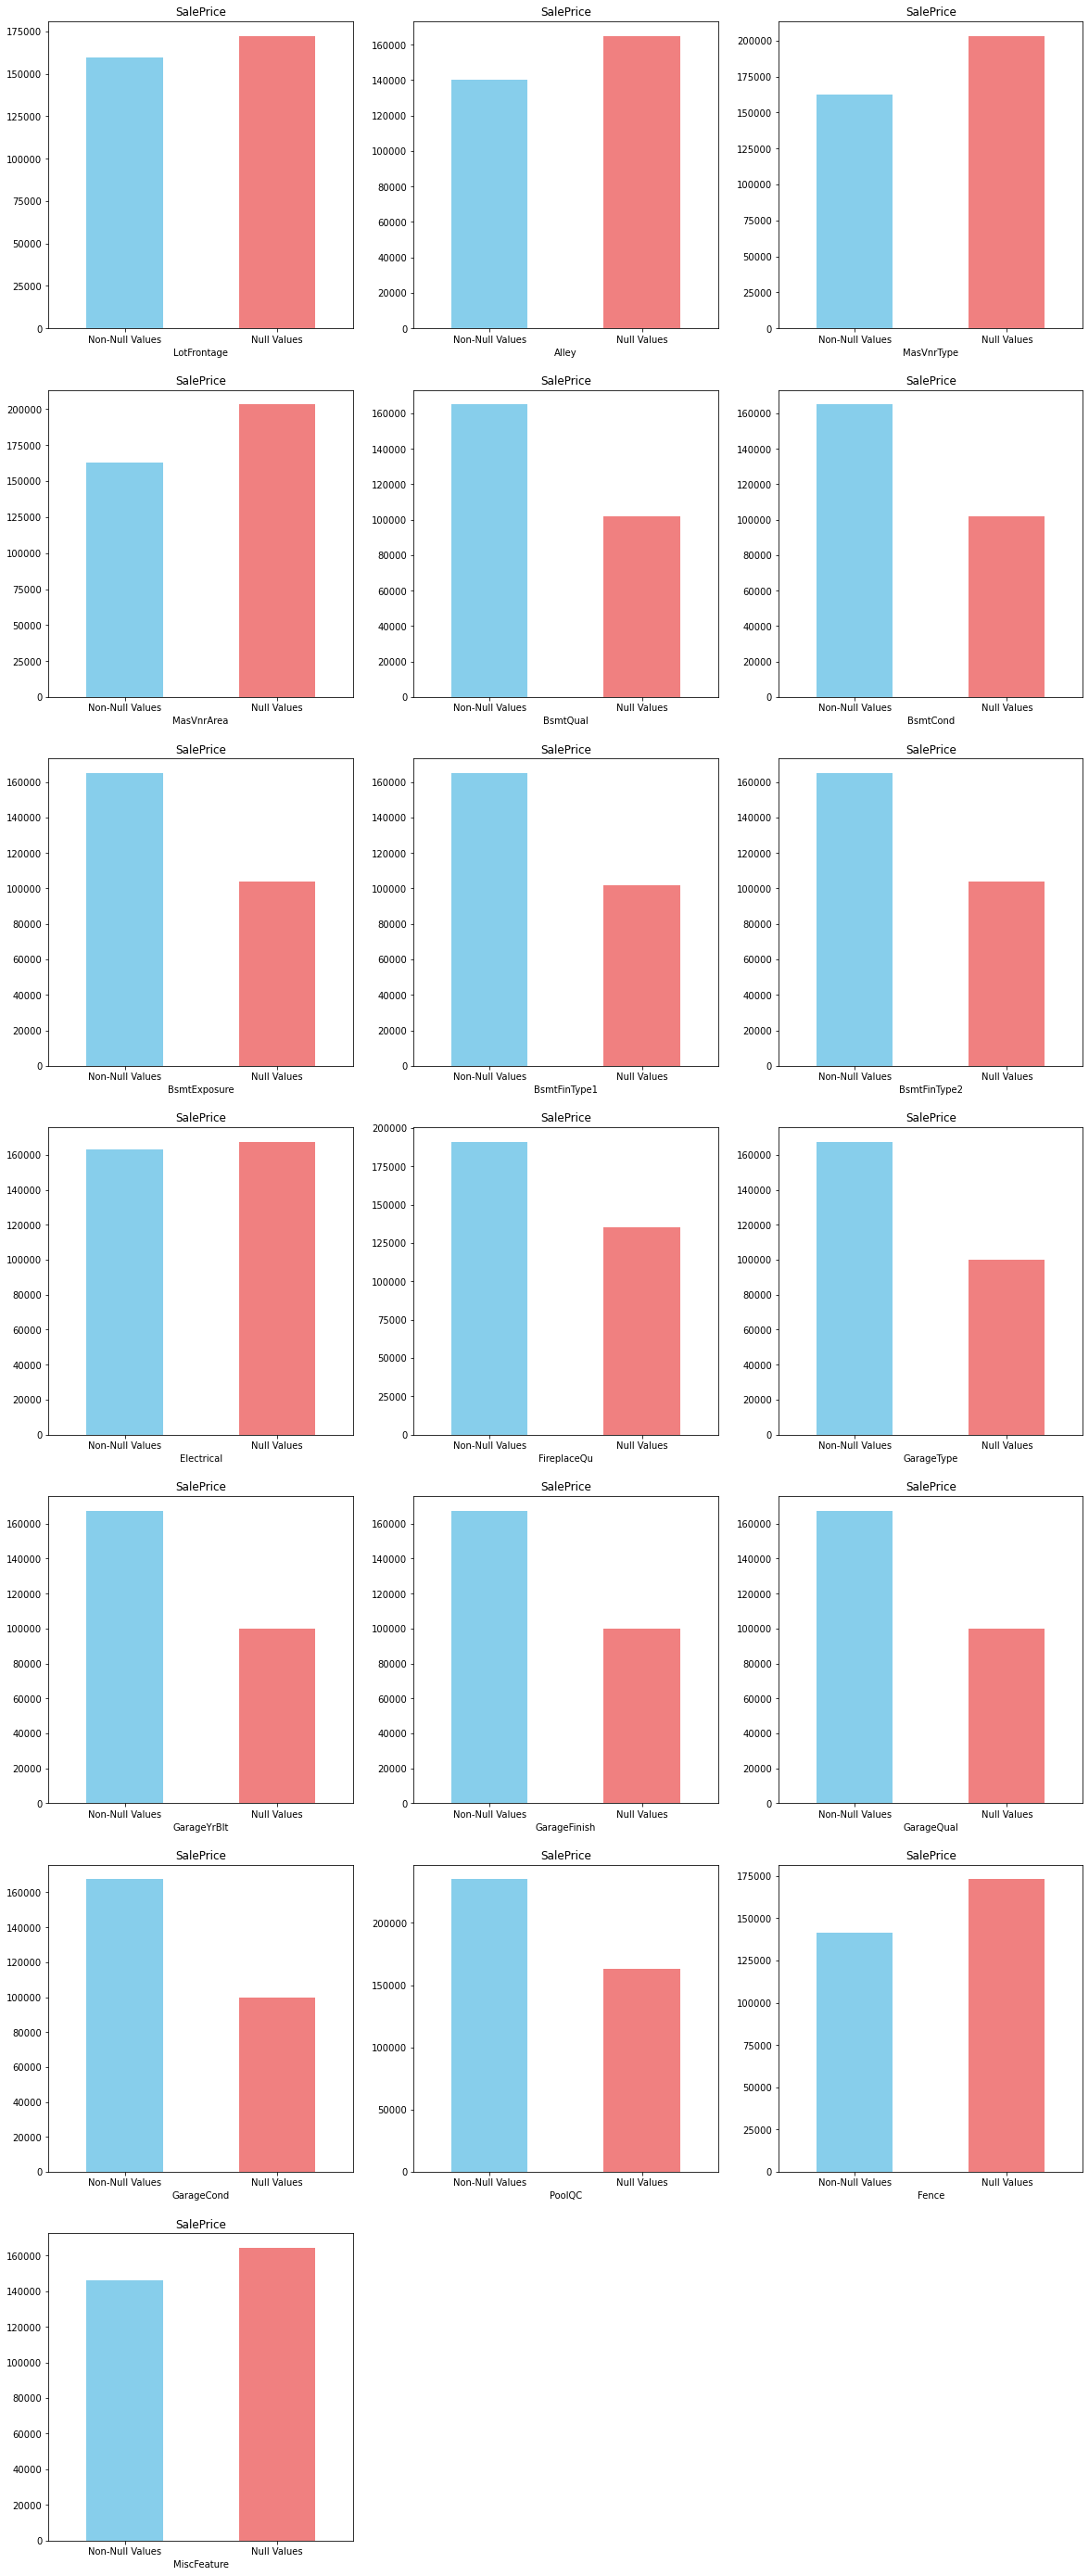

In [7]:
# Checking the impact of NaN Values on Sale Price
columns_with_nan = []
for column in df.columns:
    if df[column].isnull().sum() > 0:
        columns_with_nan.append(column)

df_copy = df.copy()

# Creating subplots to visualize the impact
fig, axs = plt.subplots(7, 3, figsize=(20, 50), squeeze=True)

for column, ax in zip(columns_with_nan, axs.flatten()):
    df_copy[column] = np.where(df_copy[column].isnull(), 'Null Values', 'Non-Null Values') 
    df_copy.groupby(column)['SalePrice'].median().plot.bar(color=['skyblue', 'lightcoral'], rot=0, ax=ax, subplots=True)

# Hiding the last two subplots in the last row
axs[6, 1].set_axis_off()
axs[6, 2].set_axis_off()

plt.show()


In [8]:
# Checking the number of numerical and categorical features
numerical_features = []
categorical_features = []

for column in df.columns:
    if df[column].dtype != 'O':  # Checking if the column is of numerical type
        numerical_features.append(column)
    else:
        categorical_features.append(column)

print('Number of numerical features in the dataset:', len(numerical_features))
print('Number of categorical features in the dataset:', len(categorical_features))


Number of numerical features in the dataset: 38
Number of categorical features in the dataset: 43


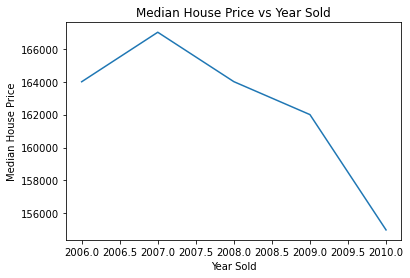

In [9]:
# Checking if the median price changes with the year sold
df['YrSold'] = df['YrSold'].astype('int')
median_price_by_year = df.groupby('YrSold')['SalePrice'].median()

# Plotting the results
median_price_by_year.plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title('Median House Price vs Year Sold')
plt.show()


<p>We can observe that the average house price shows a decline after 2007, with a significant drop following the 2008 housing bubble crash. This suggests that the year in which a house was sold has a notable impact on its sale price.</p>


In [10]:
# Extracting the Year Features from the Dataset and examining price variation based on estate age
year_related_columns = []

for column in df.columns:
    if 'Yr' in column or 'Year' in column or 'year' in column or 'yr' in column:
        year_related_columns.append(column)

print('List of features with Year-related information:')
print(year_related_columns)


List of features with Year-related information:
['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']


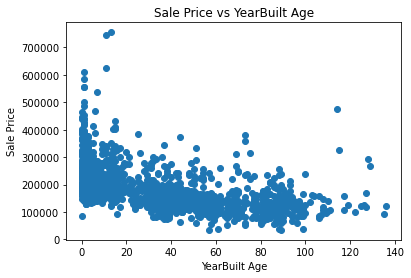

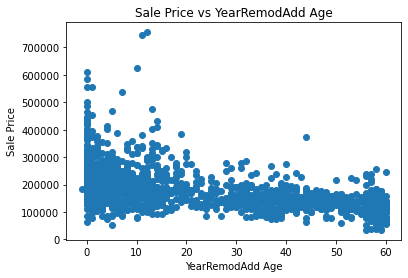

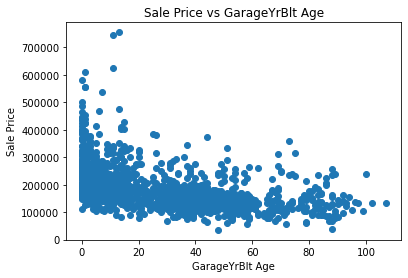

In [11]:
# Comparing the Age of the Building / Renovated Building / Garage with the Sold Price
for feature in year_related_columns:
    if feature != 'YrSold':
        data = df.copy()
        data[feature] = data['YrSold'] - data[feature]
        
        # Creating a scatter plot
        plt.scatter(data[feature], data['SalePrice'])
        plt.xlabel(f'{feature} Age')
        plt.ylabel('Sale Price')
        plt.title(f'Sale Price vs {feature} Age')
        plt.show()


In [12]:
#We are dropping the 'Id' column from the dataset as it is not useful for the prediction use case:
df.drop('Id', axis=1, inplace=True)

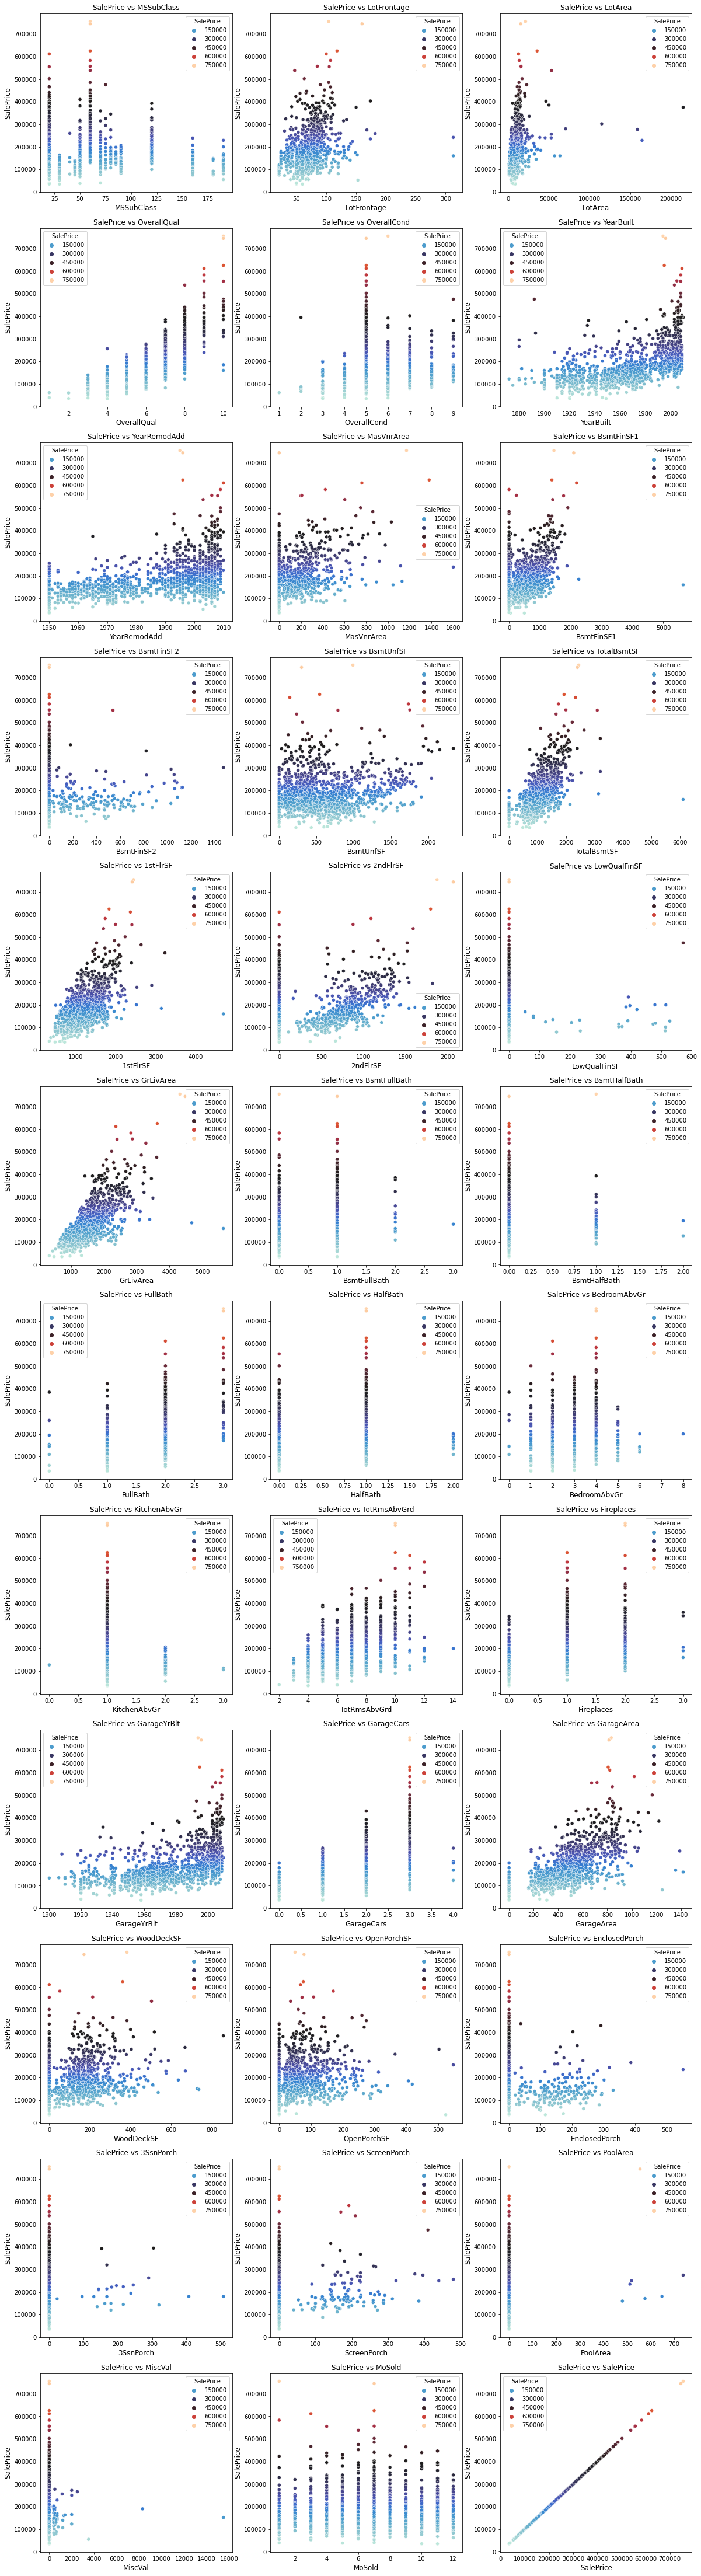

In [13]:
# Visualizing the relationship between numerical predictor variables and the target variable (SalePrice)

# Selecting numerical columns for analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64'])

# Creating subplots for data visualization
fig, axs = plt.subplots(12, 3, figsize=(20, 80))

# Looping through numerical columns to create scatterplots
for column, ax in zip(numerical_columns.columns, axs.flatten()):
    sns.scatterplot(x=column, y='SalePrice', hue='SalePrice', data=numerical_columns, ax=ax, palette='icefire')
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('SalePrice', fontsize=12)
    ax.set_title(f'SalePrice vs {column}')

plt.show()


<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5;">
    <p style="color: #333;"><strong>Observations from the Scatterplots:</strong></p>
    <ol>
        <li style="color: #333;">Newer properties tend to command higher prices compared to older properties.</li>
        <li style="color: #333;">There is a clear positive correlation between Ground Living Area (GRLiving Area) and property prices. As the living area increases, the property price tends to rise.</li>
        <li style="color: #333;">The total basement area, which is closely related to the total living area, also exhibits a direct proportional relationship with property prices.</li>
        <li style="color: #333;">The month of sale (Month sold) does not appear to significantly affect property prices.</li>
    </ol>
</div>


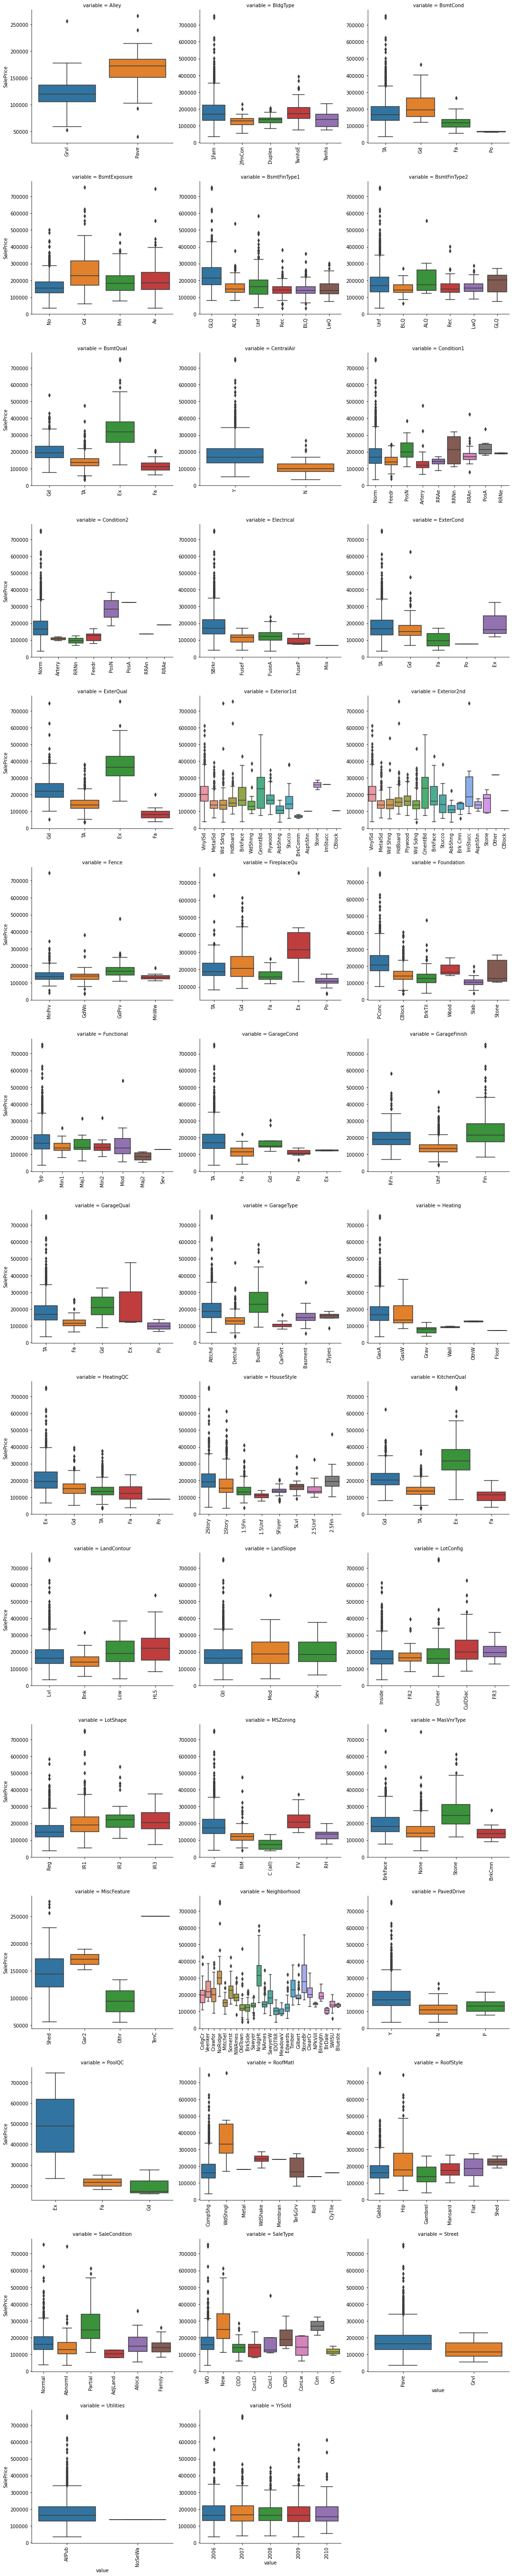

In [14]:
# Plotting Categorical Features with Sale Price
import seaborn as sns
import matplotlib.pyplot as plt

def facetgrid_boxplot(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

categorical = df.select_dtypes(exclude=['int64', 'float64'])
melted_data = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical.columns]))
g = sns.FacetGrid(melted_data, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(facetgrid_boxplot, "value", "SalePrice")


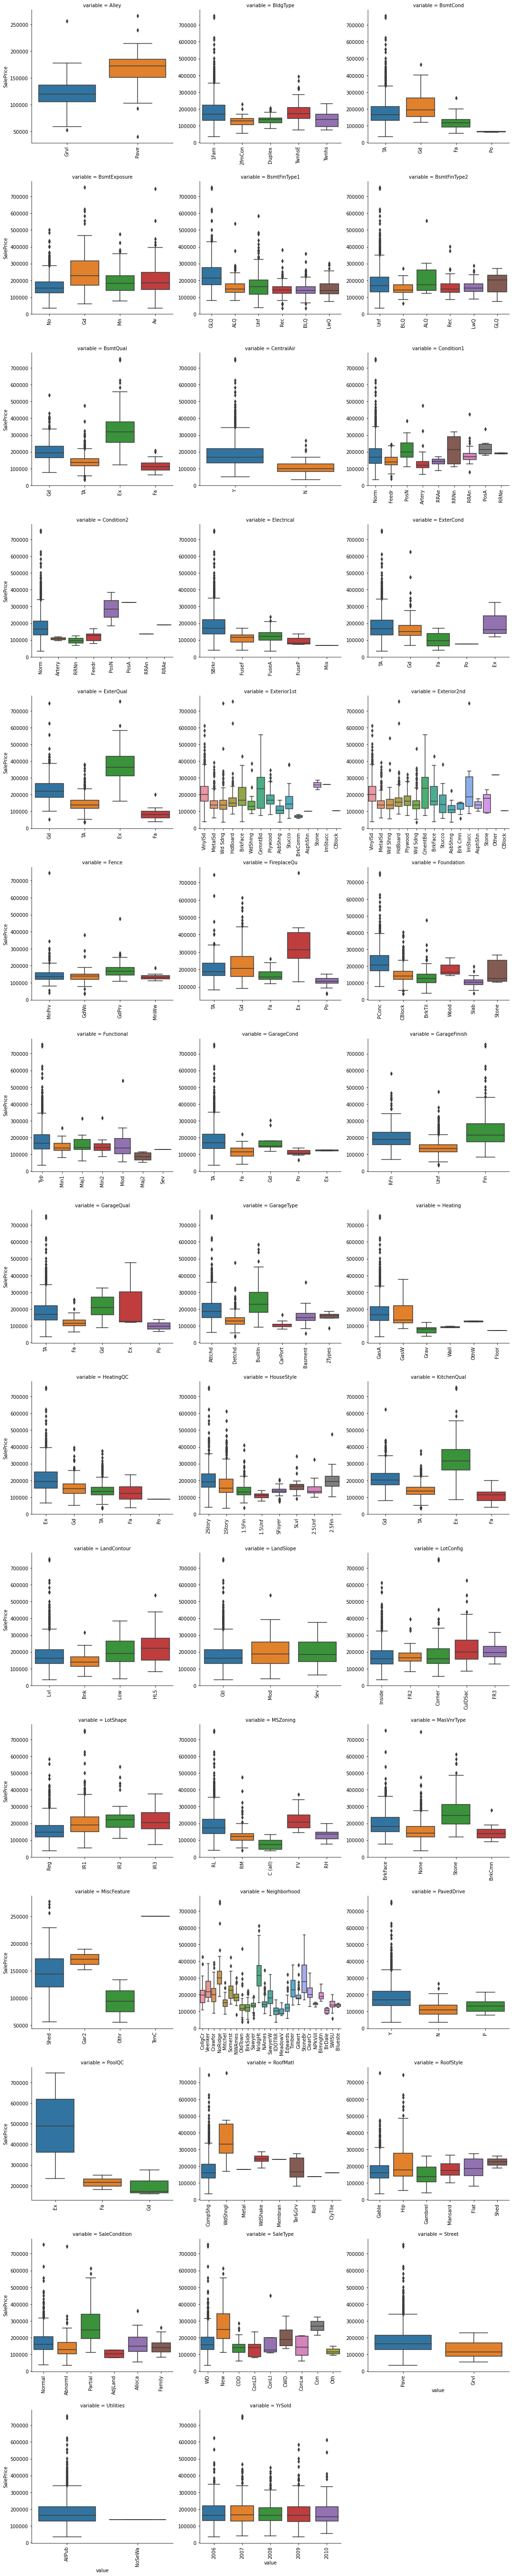

In [15]:
# Visualizing Categorical Features Impact on Sale Price

# Define a function for boxplot visualization
def visualize_categorical_features(x, y, **kwargs):
    sns.boxplot(x=x, y=y)
    plt.xticks(rotation=90)

# Selecting categorical features
categorical_features = df.select_dtypes(exclude=['int64', 'float64'])

# Melting the data for plotting
melted_data = pd.melt(df, id_vars=['SalePrice'], value_vars=sorted(df[categorical_features.columns]))

# Creating a FacetGrid for categorical feature visualization
g = sns.FacetGrid(melted_data, col="variable", col_wrap=3, sharex=False, sharey=False, height=5)
g = g.map(visualize_categorical_features, "value", "SalePrice")

<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5;">
    <p>During the feature engineering process, we address a few outliers by capping them to a lower percentile. From the box plots above, we observe the following:</p>
    <ol>
        <li>Paved alley properties tend to command higher prices.</li>
        <li>Houses with good and excellent garages also fetch higher prices.</li>
        <li>Houses with kitchens of good quality have a positive impact on their sale prices.</li>
        <li>Houses with good and excellent basement quality are sold at higher prices compared to others.</li>
    </ol>
</div>


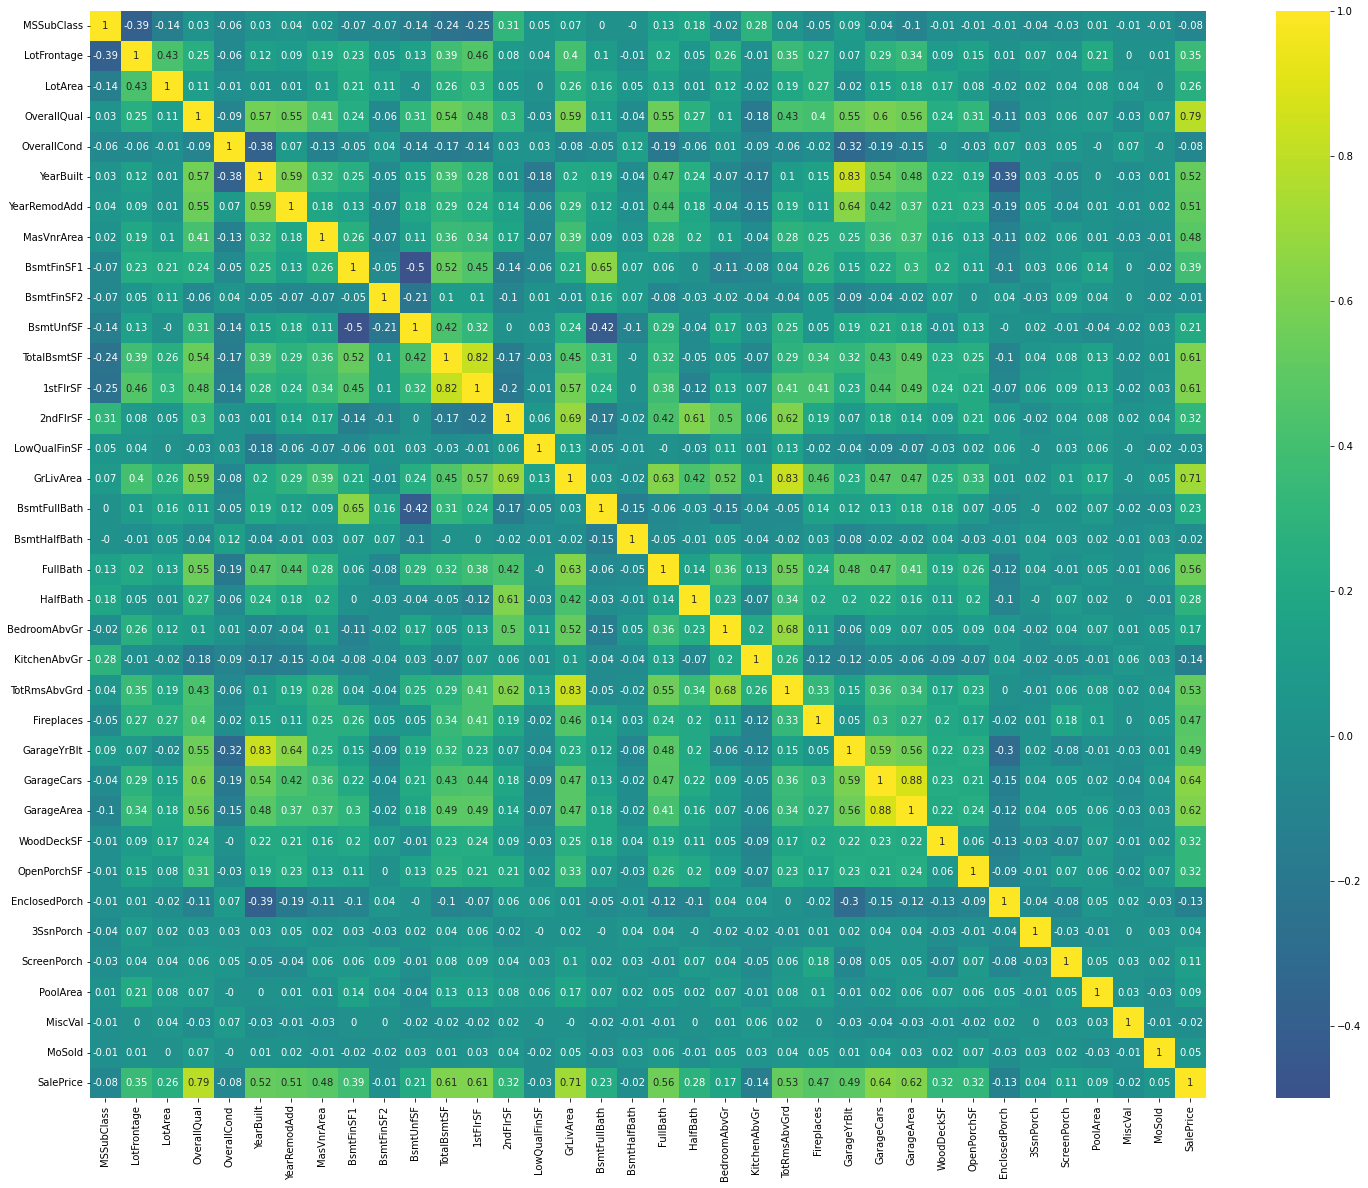

In [16]:
# Visualizing the Correlation

# Creating a heatmap of numerical feature correlations
plt.subplots(figsize=(25, 20))
correlation_matrix = round(numerical_columns.corr(), 2)
sns.heatmap(correlation_matrix, cmap='viridis', annot=True, center=0)
plt.show()

<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5;">
    <p>We have observed the presence of highly correlated features. We will address the removal of these highly correlated attributes in the upcoming steps.</p>
</div>


<h2>Data Preparation</h2>

In [17]:
# Creating a new Column to determine the age of the property
df['age']=df['YrSold']-df['YearBuilt']
df['garage_age'] = df['YrSold'] - df['GarageYrBlt']
df['remodel_age'] = df['YrSold'] - df['YearRemodAdd']

df.drop('GarageYrBlt',axis=1,inplace=True)

In [18]:
# Converting the Year to String since they are categorical features and should not be treated as numerical features
df[['MSSubClass']] = df[['MSSubClass']].astype(str) 
df['YrSold'] = df['YrSold'].astype(str)
df['MoSold'] = df['MoSold'].astype(str)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,age,garage_age,remodel_age
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500,5,5.0,5
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500,31,31.0,31
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500,7,7.0,6
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000,91,8.0,36
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000,8,8.0,8


<div style="font-family: Arial, sans-serif; font-size: 16px; line-height: 1.5;">
    <p>Instead of removing rows or columns, we choose to handle missing values by imputing them with values like 'None' or default values. This approach is based on the assumption that when a specific feature is missing for a property, it was left blank during data collection.</p>
</div>


In [19]:
# Getting a list of columns with Null Values

# Calculate the percentage of missing values for each column
null_percentage = round(df.isnull().sum() / len(df.index) * 100, 2)

# Select columns with missing values (percentage > 0)
columns_with_null = null_percentage.sort_values(ascending=False)[null_percentage > 0]

# Print the list of columns with their respective missing value percentages
print(columns_with_null)


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
garage_age       5.55
GarageFinish     5.55
GarageType       5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64


In [20]:
# Handling Missing Values based on Data Description

# For 'PoolQC', NA indicates no pool, so we fill with 'None'
df['PoolQC'] = df['PoolQC'].fillna('None')

# For 'MiscFeature', NA indicates no miscellaneous feature, so we fill with 'None'
df['MiscFeature'] = df['MiscFeature'].fillna('None')

# For 'Alley', NA indicates no alley access, so we fill with 'None'
df['Alley'] = df['Alley'].fillna('None')

# For 'FireplaceQu', NA indicates no fireplace, so we fill with 'None'
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# For 'Fence', NA indicates no fence, so we fill with 'None'
df['Fence'] = df['Fence'].fillna('None')

# For 'FireplaceQu', NA indicates no fireplace, so we fill with 'None'
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

# For garage-related columns, NA indicates no garage, so we fill with 'None' or 0 for 'garage_age'
df['GarageCond'] = df['GarageCond'].fillna('None')
df['GarageType'] = df['GarageType'].fillna('None')
df['GarageFinish'] = df['GarageFinish'].fillna('None')
df['GarageQual'] = df['GarageQual'].fillna('None')
df['garage_age'] = df['GarageQual'].fillna(0)  # No Garage, so no age

# For basement-related columns, NA indicates no basement, so we fill with 'None'
df['BsmtExposure'] = df['BsmtExposure'].fillna('None')
df['BsmtFinType2'] = df['BsmtFinType2'].fillna('None')
df['BsmtCond'] = df['BsmtCond'].fillna('None')
df['BsmtQual'] = df['BsmtQual'].fillna('None')
df['BsmtFinType1'] = df['BsmtFinType1'].fillna('None')

# For 'MasVnrType', NA indicates no masonry veneer, so we fill with 'None'
# For 'MasVnrArea', NA indicates no masonry area, so we fill with 0
df['MasVnrType'] = df['MasVnrType'].fillna('None')
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)


In [21]:
# Getting a list of columns with Null Values

# Calculate the percentage of missing values for each column
null_percentage = round(df.isnull().sum() / len(df.index) * 100, 2)

# Select columns with missing values (percentage > 0)
columns_with_null = null_percentage.sort_values(ascending=False)[null_percentage > 0]

# Print the list of columns with their respective missing value percentages
print(columns_with_null)

LotFrontage    17.74
Electrical      0.07
dtype: float64


In [22]:
# Handling Missing Values in 'LotFrontage'

# Replace missing values in 'LotFrontage' with the median value of the neighborhood
df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))


In [23]:
# Handling Missing Values in 'Electrical'

# Fill missing values in 'Electrical' with the mode (most frequent value)
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


In [24]:
# Getting a list of columns with Null Values

# Calculate the percentage of missing values for each column
null_percentage = round(df.isnull().sum() / len(df.index) * 100, 2)

# Select columns with missing values (percentage > 0)
columns_with_null = null_percentage.sort_values(ascending=False)[null_percentage > 0]

# Print the list of columns with their respective missing value percentages
print(columns_with_null)

Series([], dtype: float64)


In [25]:
print(df['Utilities'].value_counts())
print(df['Street'].value_counts())
print(df['PoolQC'].value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
None    1453
Gd         3
Ex         2
Fa         2
Name: PoolQC, dtype: int64


In [26]:
# Identifying and Removing Redundant Features

def redundant_feature(df):
    # Initialize a list to store redundant feature names
    redundant = []
    
    # Iterate through columns in the DataFrame
    for column in df.columns:
        # Calculate the counts of each unique value in the column
        counts = df[column].value_counts()
        
        # Get the count of the most frequent value
        count_max = counts.iloc[0]
        
        # Check if the most frequent value represents more than 99% of the data
        if count_max / len(df) * 100 > 99:
            # If so, consider the feature as redundant and add it to the list
            redundant.append(column)
    
    # Convert the redundant features list to a regular list
    redundant = list(redundant)
    
    # Return the list of redundant features
    return redundant


In [27]:
redundant_cols = redundant_feature(df)
redundant_cols

['Street', 'Utilities', 'PoolArea', 'PoolQC']

In [28]:
df.drop(redundant_cols,axis=1,inplace=True)

In [29]:
df.shape

(1460, 78)

In [30]:
# Creating New Features Based on Existing Features

# Vintage house with remodeled version plays an important role in prediction (i.e., higher price)
df['YrBltAndRemod'] = df['YearBuilt'] + df['YearRemodAdd']

# Overall area for all floors and basement plays an important role, creating a total area in square feet column
df['Total_sqr_footage'] = (df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'])

# Creating a derived column for the total number of bathrooms
df['Total_Bathrooms'] = (df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath']))

# Creating a derived column for the total porch area
df['Total_porch_sf'] = (df['OpenPorchSF'] + df['3SsnPorch'] + df['EnclosedPorch'] + df['ScreenPorch'] + df['WoodDeckSF'])


In [31]:
#Creating Dummy Variables for Categorical Columns
num_col=[]
cat_col=[]
for i in df.columns:
    if df[i].dtypes != 'O':
        num_col.append(i)
    else:
        cat_col.append(i)
df_dummy= pd.get_dummies(df[cat_col])   
df=pd.concat([df,df_dummy],axis=1)
df= df.drop(cat_col,axis=1)        

In [32]:
X = df.drop('SalePrice',axis=1)
y = df['SalePrice']

In [33]:
# Checking Correlated Features

# Calculate the correlation matrix
corr = X.corr()

# Filter correlations greater than or equal to 0.6
corr1 = corr[abs(corr) >= 0.6]

# Remove repetition and correlations of 1
corr2 = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))

# Stack the correlation matrix to get pairs of correlated features
corr_result = corr2.stack()

# Print pairs of correlated features with absolute correlation greater than 0.6
print(corr_result[(abs(corr_result) > 0.6)])


OverallQual           GarageCars               0.600671
                      YrBltAndRemod            0.628633
                      ExterQual_TA            -0.646247
YearBuilt             age                     -0.999036
                      YrBltAndRemod            0.931109
                      Foundation_PConc         0.651199
                      BsmtQual_TA             -0.631734
YearRemodAdd          remodel_age             -0.997930
                      YrBltAndRemod            0.845742
MasVnrArea            MasVnrType_None         -0.687737
BsmtFinSF1            BsmtFullBath             0.649212
                      Total_sqr_footage        0.724218
                      BsmtFinType1_Unf        -0.628690
BsmtFinSF2            BsmtFinType2_Unf        -0.716235
BsmtUnfSF             BsmtFinType1_Unf         0.602707
TotalBsmtSF           1stFlrSF                 0.819530
                      Total_sqr_footage        0.640590
1stFlrSF              Total_sqr_footage        0

In [34]:
X.drop(['OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',
        '1stFlrSF','2ndFlrSF','GrLivArea','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','Fireplaces','GarageCars',
        'WoodDeckSF','YrBltAndRemod','Total_Bathrooms','MSSubClass_120','MSSubClass_160','MSSubClass_190','MSSubClass_20',
        'MSSubClass_45','MSSubClass_50','MSSubClass_60','MSSubClass_75','MSSubClass_80','MSSubClass_85','MSSubClass_90',
        'MSZoning_FV','MSZoning_RL','Alley_Grvl','Alley_None','LotShape_IR1','LandContour_Bnk','LotConfig_Corner',
        'LandSlope_Gtl','Neighborhood_NPkVill','Condition1_Feedr','Condition2_Feedr','Condition2_RRAe','BldgType_1Fam',
        'HouseStyle_1Story','RoofStyle_Flat','RoofStyle_Gable','RoofMatl_CompShg','Exterior2nd_AsbShng','Exterior2nd_BrkFace',
        'Exterior2nd_CBlock','Exterior2nd_CmentBd','Exterior2nd_HdBoard','Exterior2nd_MetalSd','Exterior2nd_Plywood',
        'Exterior2nd_Stucco','Exterior2nd_VinylSd','Exterior2nd_Wd Sdng','MasVnrType_None','ExterQual_Gd','ExterQual_TA',
        'ExterCond_Gd','Foundation_CBlock','Foundation_Slab','BsmtQual_Gd','BsmtQual_None','BsmtCond_Gd','BsmtCond_None',
        'BsmtCond_Po','BsmtExposure_None','BsmtFinType1_None','Heating_GasA','HeatingQC_Ex','CentralAir_N','Electrical_FuseA',
        'KitchenQual_Gd','GarageType_Attchd','GarageType_None','GarageFinish_None','GarageQual_Ex','GarageQual_Fa',
        'GarageQual_Gd','GarageQual_None','GarageQual_Po','GarageQual_TA','GarageCond_Ex','GarageCond_None','GarageCond_Po',
        'GarageCond_TA','PavedDrive_N','Fence_None','MiscFeature_None','SaleType_New','SaleType_WD','SaleCondition_Normal',
        'Foundation_PConc','MiscFeature_Gar2','Foundation_PConc','garage_age_None'],
         axis=1,inplace=True)
X.shape

(1460, 235)

In [35]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

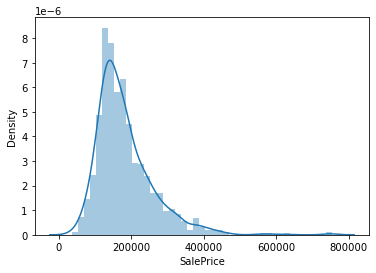

In [36]:
# Visualizing the Distribution of Target Variable
# Plot the distribution of the target variable
sns.distplot(y_train)
plt.show()

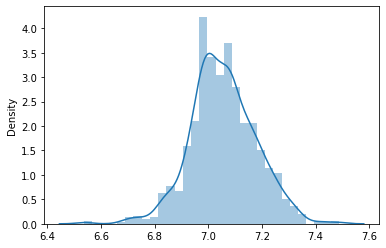

In [37]:
#Transforming the Target feature to make the data gaussian
pt = PowerTransformer(method='box-cox', standardize=False)
y_train = pt.fit_transform(y_train.to_frame())
y_test = pt.transform(y_test.to_frame())
sns.distplot(y_train)
plt.show()

In [38]:
from pandas import DataFrame
# Scaling the data using a Minmax Scaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = DataFrame(X_train)
X_train.columns = X.columns
X_test = scaler.transform(X_test)
X_test = DataFrame(X_test)
X_test.columns = X.columns

<h2>Ridge Regression</h2>

Fitting 6 folds for each of 28 candidates, totalling 168 fits


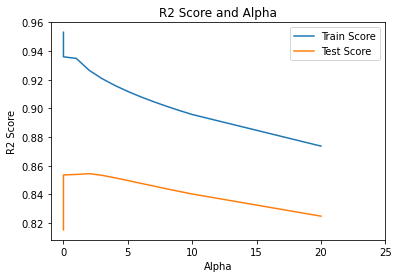

The optimum alpha is 2
The R2 Score of the model on the test dataset for optimum alpha is 0.8560225450229566
The MSE of the model on the test dataset for optimum alpha is 0.0022317589211723024


In [39]:
# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initialize Ridge regression model
ridge = Ridge()

# Using Recursive Feature Elimination (RFE) to select the top 300 variables
rfe = RFE(estimator=Ridge(), n_features_to_select=300)
rfe = rfe.fit(X_train, y_train)
selected_columns = X_train.columns[rfe.support_]
X_train_rfe = X_train[selected_columns]
X_test_rfe = X_test[selected_columns]

# Cross-validation
folds = 6
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe, y_train)

# Create a DataFrame with cross-validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# Plotting mean test and train scores with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()

# Find the optimum alpha
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)

# Fit the final Ridge model with the optimum alpha
ridge_final = Ridge(alpha=alpha)
ridge_final.fit(X_train_rfe, y_train)
ridge_coef = ridge_final.coef_

# Make predictions on the test dataset
y_test_pred = ridge_final.predict(X_test_rfe)

# Print the R2 Score and MSE of the model on the test dataset
print('The R2 Score of the model on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [40]:
# Checking Variance Inflation Factor (VIF)

# Create a DataFrame to store VIF values for each feature
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns

# Calculate VIF for each feature and store in the DataFrame
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]

# Round VIF values to two decimal places
vif['VIF'] = round(vif['VIF'], 2)

# Sort the DataFrame by VIF values in descending order
vif = vif.sort_values(by="VIF", ascending=False)

# Filter features with VIF greater than 10 (indicating multicollinearity)
high_vif = vif[vif['VIF'] > 10]

In [41]:
# Dropping Columns with High VIF

# Drop columns with high VIF from the training dataset
X_train_rfe2 = X_train_rfe.drop(high_vif.Features, axis=1)

# Drop the same columns from the test dataset
X_test_rfe2 = X_test_rfe.drop(high_vif.Features, axis=1)


Fitting 6 folds for each of 28 candidates, totalling 168 fits


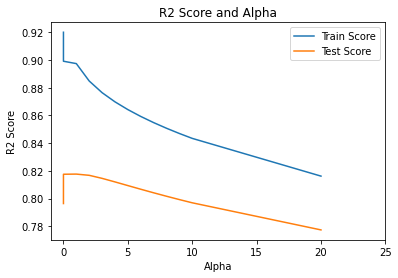

The optimum alpha is 1
The R2 Score of the model on the test dataset for optimum alpha is 0.8329088912057774
The MSE of the model on the test dataset for optimum alpha is 0.0025900379525359476


In [42]:
# Building the Second Ridge Model

# List of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

# Initialize Ridge regression model with a random state
ridge = Ridge(random_state=100)

# Cross-validation
folds = 6
model_cv = GridSearchCV(estimator=ridge, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe2, y_train)

# Create a DataFrame with cross-validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 30]

# Convert alpha values to integers
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# Plotting mean test and train scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.xticks(np.arange(0, 30, 5))
plt.show()

# Find the optimum alpha
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)

# Fit the final Ridge model with the optimum alpha and random state
ridge_final2 = Ridge(alpha=alpha, random_state=100)
ridge_final2.fit(X_train_rfe2, y_train)
ridge_coef2 = ridge_final2.coef_

# Make predictions on the test dataset
y_test_pred = ridge_final2.predict(X_test_rfe2)

# Print the R2 Score and MSE of the model on the test dataset
print('The R2 Score of the model on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [43]:
# Displaying the Coefficients of the Model

# Create a DataFrame to store the coefficients
ridge_coeff2 = pd.DataFrame(np.atleast_2d(ridge_coef2), columns=X_train_rfe2.columns)
ridge_coeff2 = ridge_coeff2.T
ridge_coeff2.rename(columns={0: 'Ridge Coefficient'}, inplace=True)

# Sort the coefficients by magnitude in descending order
ridge_coeff2.sort_values(by=['Ridge Coefficient'], ascending=False, inplace=True)

# Display the top 20 coefficients
ridge_coeff2.head(20)


,Ridge Coefficient
Total_sqr_footage,0.271273
TotRmsAbvGrd,0.154689
GarageArea,0.147609
LotArea,0.058798
RoofMatl_WdShngl,0.058247
OverallCond,0.055447
Condition2_PosA,0.054610
Condition2_Norm,0.044046
Total_porch_sf,0.042803
SaleType_ConLD,0.041485


<h2>Lasso</h2>

In [44]:
# Creating a Model with an Arbitrary Alpha

# Initialize Lasso regression model with an arbitrary alpha
lasso1 = Lasso(alpha=0.0001)

# Fit the Lasso model on the training dataset
lasso1.fit(X_train_rfe2, y_train)

# Make predictions on the test dataset
y_test_pred = lasso1.predict(X_test_rfe2)

# Print the R2 Score and MSE of the model on the test dataset
print('The R2 Score of the model on the test dataset for alpha=0.0001 is', r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for alpha=0.0001 is', mean_squared_error(y_test, y_test_pred))


The R2 Score of the model on the test dataset for alpha=0.0001 is 0.8389180739940513
The MSE of the model on the test dataset for alpha=0.0001 is 0.002496891096322774


Fitting 6 folds for each of 11 candidates, totalling 66 fits


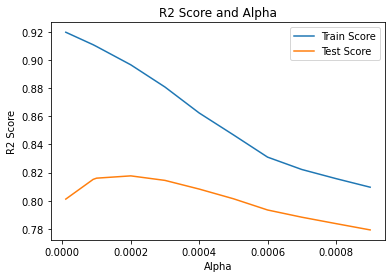

The optimum alpha is 0.0002
The R2 Score of the model on the test dataset for optimum alpha is 0.844788523374472
The MSE of the model on the test dataset for optimum alpha is 0.0024058947123532606


In [45]:
# Building a Lasso Model with GridSearch CV to Find the Optimum Alpha

# Define a list of alpha values to tune
params = {'alpha': [0.00001, 0.00009, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009]}

# Initialize Lasso regression model with a random state
lasso = Lasso(random_state=42)

# Cross-validation
folds = 6
model_cv = GridSearchCV(estimator=lasso, param_grid=params, scoring='r2', cv=folds, return_train_score=True, verbose=1)
model_cv.fit(X_train_rfe2, y_train)

# Create a DataFrame with cross-validation results
cv_results = pd.DataFrame(model_cv.cv_results_)

# Plotting mean train and test scores with alpha
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('Alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and Alpha")
plt.legend(['Train Score', 'Test Score'], loc='upper right')
plt.show()

# Find the optimum alpha
alpha = cv_results['param_alpha'].loc[cv_results['mean_test_score'].idxmax()]
print('The optimum alpha is', alpha)

# Fit the final Lasso model with the optimum alpha and random state
lasso_final2 = Lasso(alpha=alpha, random_state=100)
lasso_final2.fit(X_train_rfe2, y_train)
lasso_coef2 = lasso_final2.coef_

# Make predictions on the test dataset
y_test_pred = lasso_final2.predict(X_test_rfe2)

# Print the R2 Score and MSE of the model on the test dataset
print('The R2 Score of the model on the test dataset for optimum alpha is', r2_score(y_test, y_test_pred))
print('The MSE of the model on the test dataset for optimum alpha is', mean_squared_error(y_test, y_test_pred))


In [46]:
# Displaying the Coefficients of the Lasso Model

# Create a DataFrame to store the coefficients
lasso_coeff2 = pd.DataFrame(np.atleast_2d(lasso_coef2), columns=X_train_rfe2.columns)
lasso_coeff2 = lasso_coeff2.T
lasso_coeff2.rename(columns={0: "Lasso Coefficient"}, inplace=True)

# Sort the coefficients by magnitude in descending order
lasso_coeff2.sort_values(by=['Lasso Coefficient'], ascending=False, inplace=True)

# Display the top 20 coefficients
lasso_coeff2.head(20)


,Lasso Coefficient
Total_sqr_footage,0.455546
GarageArea,0.147623
TotRmsAbvGrd,0.121057
OverallCond,0.048804
Total_porch_sf,0.039324
CentralAir_Y,0.034733
KitchenQual_Ex,0.031074
BsmtQual_Ex,0.024421
Alley_Pave,0.019977
MSSubClass_70,0.018648
